In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot

In [2]:
data=pd.read_csv("C:/Users/Dayakar Reddy Sura/Downloads/exchange_rate.csv",index_col=0,header=0,parse_dates=True)
data.head()

,Ex_rate
date,
1990-01-01,0.7855
1990-02-01,0.7818
1990-03-01,0.7867
1990-04-01,0.7860
1990-05-01,0.7849


In [3]:
data1=data.copy()

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7588 entries, 1990-01-01 to 2010-10-10
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ex_rate  7588 non-null   float64
dtypes: float64(1)
memory usage: 118.6 KB


In [5]:
data.shape

(7588, 1)

In [6]:
data.isnull().sum()

Ex_rate    0
dtype: int64

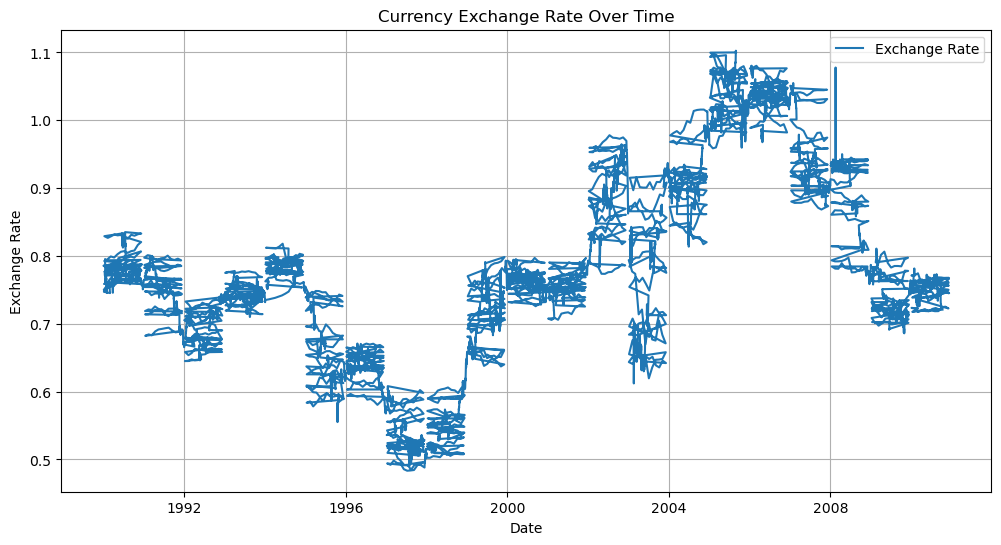

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Ex_rate'], label='Exchange Rate')
plt.title('Currency Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()

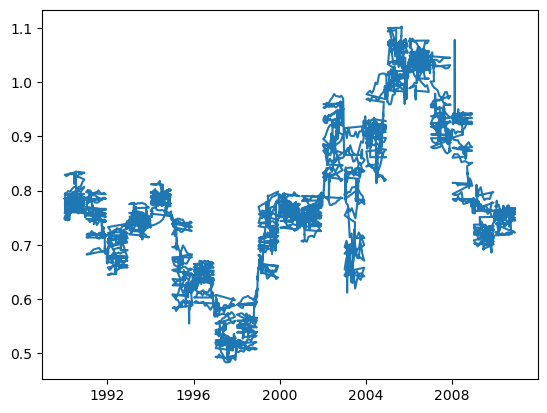

In [8]:
pyplot.plot(data)

In [9]:
upsampled=data.resample('D').mean()
print(upsampled.head(32))
print(len(upsampled))

            Ex_rate
date               
1990-01-01   0.7855
1990-01-02   0.7500
1990-01-03   0.7471
1990-01-04   0.7587
1990-01-05   0.7852
1990-01-06   0.7925
1990-01-07   0.8291
1990-01-08   0.7765
1990-01-09   0.7734
1990-01-10   0.7765
1990-01-11   0.7713
1990-01-12   0.7838
1990-01-13   0.7935
1990-01-14   0.7954
1990-01-15   0.7751
1990-01-16   0.7622
1990-01-17   0.7583
1990-01-18   0.7605
1990-01-19   0.7635
1990-01-20   0.7660
1990-01-21   0.7685
1990-01-22   0.7702
1990-01-23   0.7735
1990-01-24   0.7655
1990-01-25   0.7665
1990-01-26   0.7575
1990-01-27   0.7545
1990-01-28   0.7493
1990-01-29   0.7521
1990-01-30   0.7521
1990-01-31   0.7457
1990-02-01   0.7818
7648


In [10]:
resample=data.resample('Q')
quarterly_mean_sales=resample.mean()
quarterly_mean_sales

,Ex_rate
date,
1990-03-31,0.768018
1990-06-30,0.789865
1990-09-30,0.782203
1990-12-31,0.775779
1991-03-31,0.772048
...,...
2009-12-31,0.726991
2010-03-31,0.747118
2010-06-30,0.754604


<Axes: xlabel='date'>

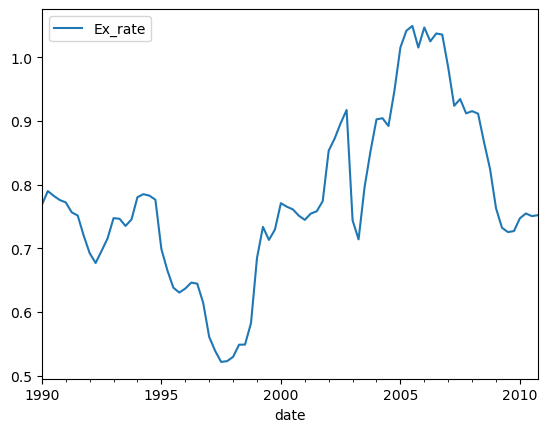

In [11]:
quarterly_mean_sales.plot()

In [12]:
# Transformation

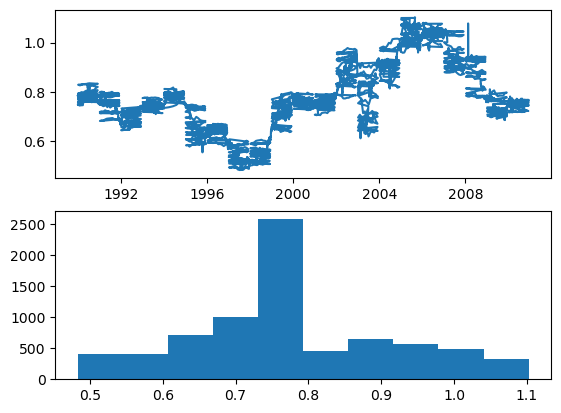

In [13]:
pyplot.subplot(211)
pyplot.plot(data)
pyplot.subplot(212)
pyplot.hist(data)
pyplot.show()

##### Square ROOT Transform

In [14]:
from numpy import sqrt

In [15]:
dataframe=pd.DataFrame(data1.values)
dataframe.columns=['Ex_rate']
dataframe['Ex_rate']=sqrt(dataframe['Ex_rate'])

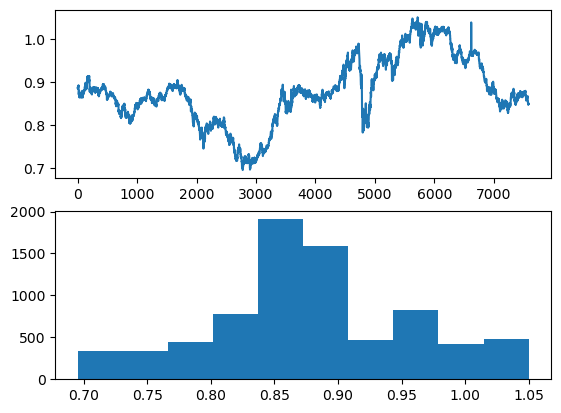

In [16]:
pyplot.subplot(211)
pyplot.plot(dataframe['Ex_rate'])
pyplot.subplot(212)
pyplot.hist(dataframe['Ex_rate'])
pyplot.show()

In [17]:
from numpy import log

In [18]:
dataframe=pd.DataFrame(data1.values)
dataframe.columns=['Ex_rate']
dataframe['Ex_rate']=log(dataframe['Ex_rate'])

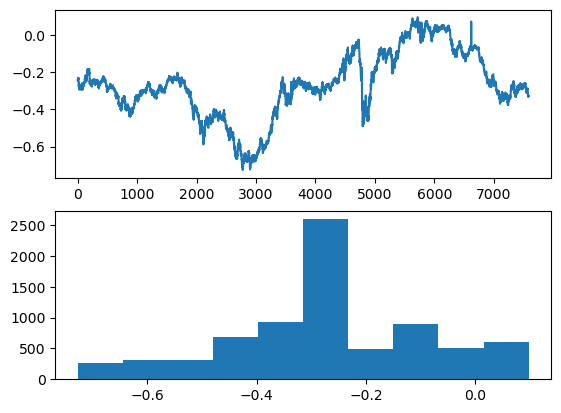

In [19]:
pyplot.subplot(211)
pyplot.plot(dataframe['Ex_rate'])
pyplot.subplot(212)
pyplot.hist(dataframe['Ex_rate'])
pyplot.show()

In [82]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [91]:
Train=quarterly_mean_sales.head(5908)
Test=quarterly_mean_sales.tail(1680)

In [92]:
def MAPE(pred,org):
    temp=np.abs((pred-org)/org)*100
    return np.mean(temp)

In [104]:
def RMSE(pred, org):
    pred = np.array(pred)
    org = np.array(org)
    squared_error = (pred - org) ** 2
    return np.sqrt(np.mean(squared_error))


In [105]:
def MAE(pred, org):
    pred = np.array(pred)
    org = np.array(org)
    abs_error = np.abs(pred - org)
    return np.mean(abs_error)

In [107]:
ses_model = SimpleExpSmoothing(Train["Ex_rate"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Ex_rate) 


C:\Users\Dayakar Reddy Sura\anaconda3\Lib\site-packages\pandas\util\_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


8.170187141420927

In [108]:
RMSE(pred_ses,Test.Ex_rate)

0.07360649714976714

In [109]:
MAE(pred_ses,Test.Ex_rate)

0.062245401435443604

#### ARIMA

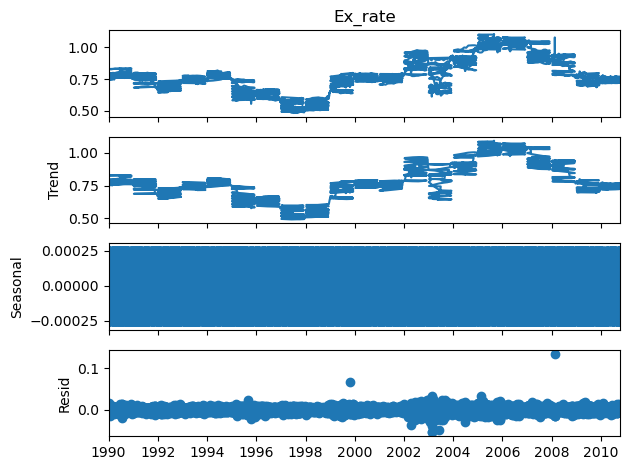

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose=seasonal_decompose(data.Ex_rate,period=12)
decompose.plot()
plt.show()

In [21]:
import statsmodels.graphics.tsaplots as tsa_plots

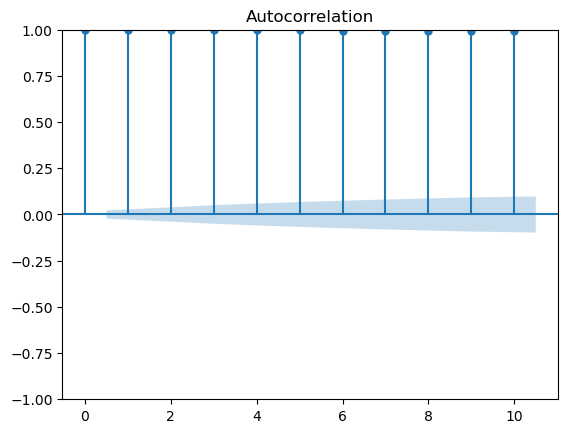

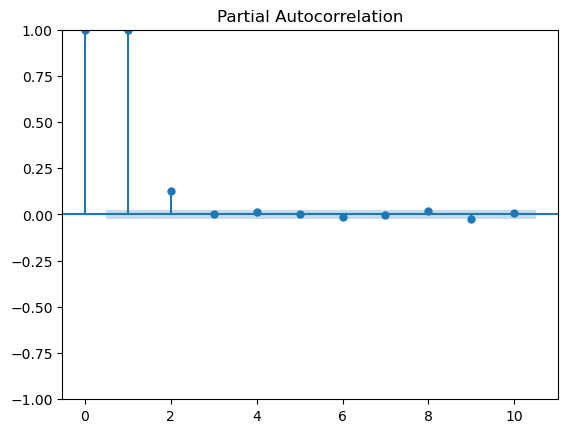

In [22]:
tsa_plots.plot_acf(data.Ex_rate,lags=10)
tsa_plots.plot_pacf(data.Ex_rate,lags=10)
plt.show()

In [23]:
split_point=len(data)-1680
dataset,validation = data[0:split_point],data[split_point:]
print('Dataset %d,validation %d' %(len(dataset),len(validation)))
dataset.to_csv('dataset.csv',header=True)
validation.to_csv('validation.csv',header=True)

Dataset 5908,validation 1680


In [24]:
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

In [25]:
p, d, q = 1, 1, 1

In [26]:
model = ARIMA(data['Ex_rate'], order=(p, d, q))
model_fit = model.fit()
print(model_fit.summary())

C:\Users\Dayakar Reddy Sura\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dayakar Reddy Sura\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dayakar Reddy Sura\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dayakar Reddy Sura\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_d

                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Mon, 05 Aug 2024   AIC                         -56102.322
Time:                        14:32:50   BIC                         -56081.519
Sample:                             0   HQIC                        -56095.182
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0

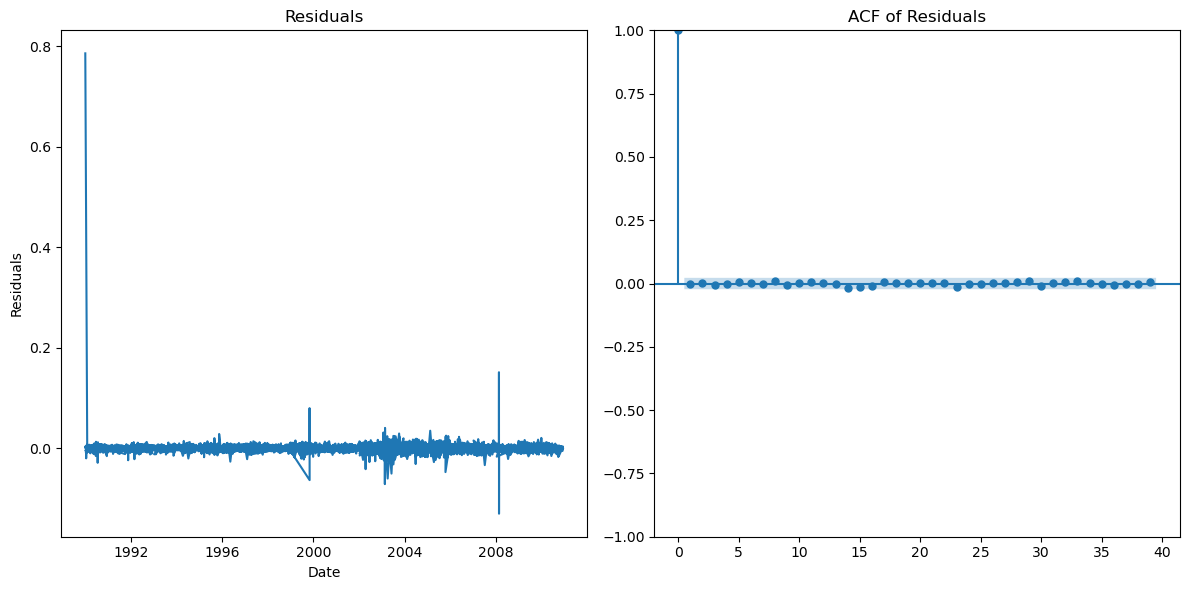

1.3131537827704975


In [27]:
residuals = model_fit.resid
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(residuals)
plt.title('Residuals')
plt.xlabel('Date')
plt.ylabel('Residuals')

plt.subplot(122)
tsa_plots.plot_acf(residuals, ax=plt.gca())
plt.title('ACF of Residuals')

plt.tight_layout()
plt.show()

print(sm.stats.durbin_watson(residuals))


C:\Users\Dayakar Reddy Sura\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Dayakar Reddy Sura\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


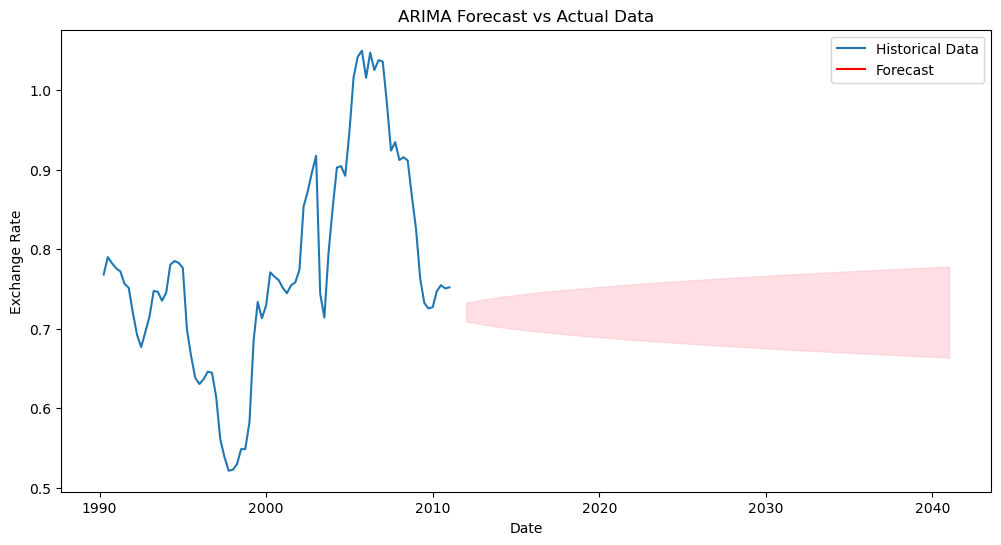

In [28]:
# Forecasting
forecast_steps = 30
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=quarterly_mean_sales.index[-1] + pd.DateOffset(days=1), periods=forecast_steps, freq='Y')
forecast_series = pd.Series(forecast.predicted_mean, index=forecast_index)

# Confidence intervals
conf_int = forecast.conf_int()
plt.figure(figsize=(12, 6))
plt.plot(quarterly_mean_sales.index, quarterly_mean_sales['Ex_rate'], label='Historical Data')
plt.plot(forecast_series.index, forecast_series, color='red', label='Forecast')
plt.fill_between(forecast_series.index, conf_int.iloc[:, 1], conf_int.iloc[:, 0], color='pink', alpha=0.5)
plt.title('ARIMA Forecast vs Actual Data')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()


#### ExponentialSmoothing

In [29]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [45]:
def MAPE(pred,org):
    temp=np.abs((pred-org)/org)*100
    return np.mean(temp)

In [31]:
exp_smooth_model = ExponentialSmoothing(quarterly_mean_sales['Ex_rate'], trend='add', seasonal='add', seasonal_periods=12)
exp_smooth_fit = exp_smooth_model.fit(smoothing_level=1)


C:\Users\Dayakar Reddy Sura\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\_smoothers.py:138: RuntimeWarning: divide by zero encountered in scalar divide
  g = (g - lb) / (ub - lb)


In [96]:
pred_ses = exp_smooth_fit.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Ex_rate) 

2.996996257182785

In [110]:
RMSE(pred_ses,Test.Ex_rate)

0.07360649714976714

In [111]:
MAE(pred_ses,Test.Ex_rate)

0.062245401435443604

In [32]:
# Forecasting with Exponential Smoothing
exp_forecast = exp_smooth_fit.forecast(steps=forecast_steps)
exp_forecast_index = pd.date_range(start=quarterly_mean_sales.index[-1] + pd.DateOffset(days=1), periods=forecast_steps, freq='Q')
exp_forecast_series = pd.Series(exp_forecast, index=exp_forecast_index)


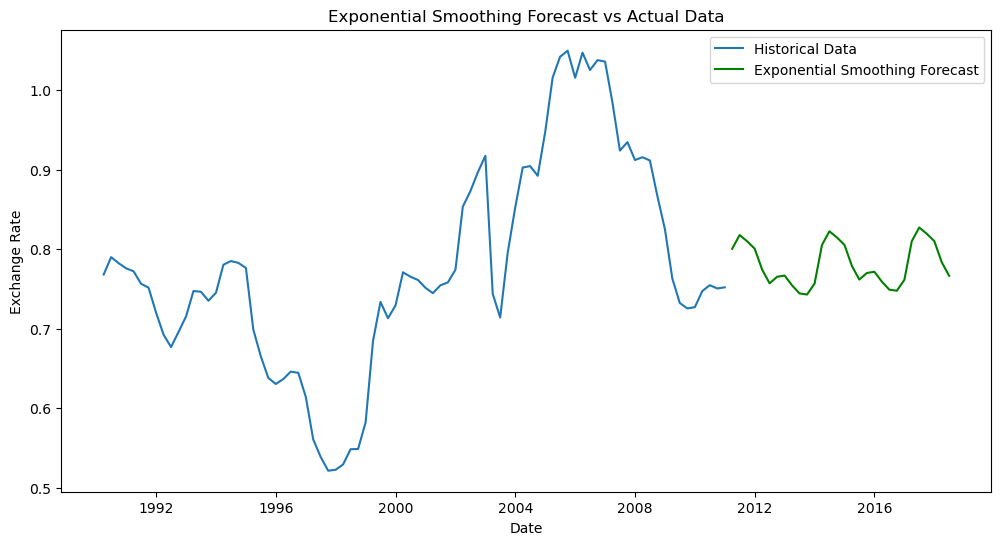

In [33]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(quarterly_mean_sales.index, quarterly_mean_sales['Ex_rate'], label='Historical Data')
plt.plot(exp_forecast_series.index, exp_forecast_series, color='green', label='Exponential Smoothing Forecast')
plt.title('Exponential Smoothing Forecast vs Actual Data')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [35]:
Train=data.head(5908)
Test=data.tail(1680)

In [112]:
ses_model = SimpleExpSmoothing(Train["Ex_rate"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Ex_rate) 

C:\Users\Dayakar Reddy Sura\anaconda3\Lib\site-packages\pandas\util\_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


8.170187141420927

In [65]:
from sklearn.metrics import mean_absolute_error, mean_squared_error



In [63]:
data.isnull().sum()

Ex_rate    0
dtype: int64

In [103]:
ses_model = SimpleExpSmoothing(Train["Ex_rate"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
RMSE(pred_ses,Test.Ex_rate) 

C:\Users\Dayakar Reddy Sura\anaconda3\Lib\site-packages\pandas\util\_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


0.07360649714976714

Conclusion
Based on the error metrics (MAE, RMSE, and MAPE):

The Exponential Smoothing model appears to perform slightly better overall compared to the ARIMA model, as it has lower MAE, RMSE, and MAPE. This indicates that the Exponential Smoothing model’s forecasts are more accurate and consistent, with fewer large errors.

ARIMA Model might still be valuable if the data had more complex patterns or if further model tuning (such as adjusting the (p, d, q) parameters) could improve performance.
Insights and Recommendations
For Simpler Forecasting Needs: If forecasting requirements are straightforward and involve capturing basic trends and seasonality, the Exponential Smoothing model is recommended due to its ease of use and slightly better performance metrics.

For Complex Data Patterns: If the time series exhibits more complex patterns or requires fine-tuning for accuracy, ARIMA might still be appropriate, especially after adjusting parameters or exploring more advanced ARIMA variants.

Model Selection: It's crucial to select the model based on the specific characteristics of the data and the forecasting requirements. Further cross-validation or testing might help in making a more robust decision.